<a href="https://colab.research.google.com/github/shubhankar-mern/MLBasicsLearn/blob/imp/FaceHeadshotfirstPath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
from google.colab import files


# Save the current working directory
original_directory = os.getcwd()
print(original_directory)


# Specify the target folder
target_folder = 'Trainset'

# Check if the folder exists, and create it if not
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# Change the working directory to the newly created directory
print(f"Directory changed  to '{target_folder}'")
os.chdir(target_folder)


# Upload files to the target folder
uploaded = files.upload()
print(f"Files uploaded to '{target_folder}'")

# Change curr dir to before
os.chdir(original_directory)
print(f"Directory changed to '{original_directory}'")

/content
Directory changed  to 'Trainset'


Saving Screenshot 2023-12-11 014459.png to Screenshot 2023-12-11 014459.png
Files uploaded to 'Trainset'
Directory changed to '/content'


In [2]:
## Only if you wanna delete the Trainset
import shutil

# Specify the folder path to be deleted
folder_path = 'Trainset'

# Use shutil.rmtree to delete the folder and its contents
shutil.rmtree(folder_path)

print(f"Folder '{folder_path}' and its contents have been deleted.")

Folder 'Trainset' and its contents have been deleted.


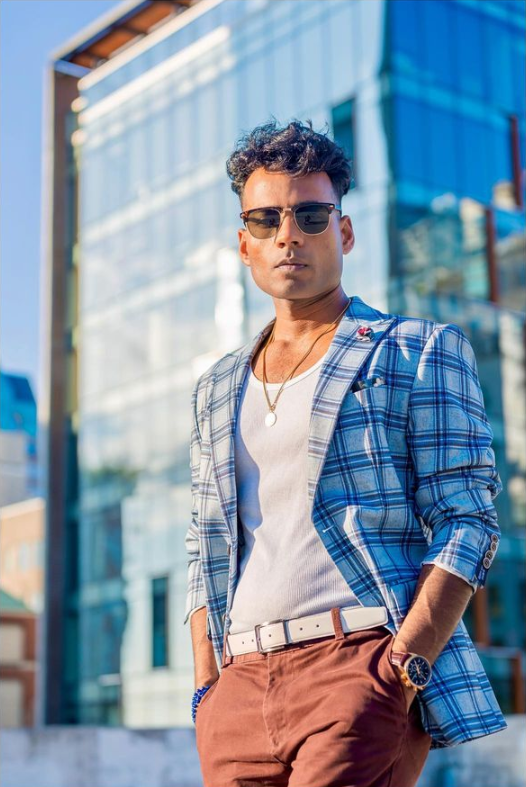

/content


In [4]:
## Lets display the images
from IPython.display import Image, display



# Specify the directory name
dir_name = 'Trainset'

# List the contents of the directory
dir_contents = os.listdir(dir_name)


# Display each image in the notebook
for i,image_file in enumerate(dir_contents):
    if i == 0:
      image_path = os.path.join(dir_name, image_file)
      display(Image(filename=image_path))

# Save the current working directory
org_directory = os.getcwd()
print(org_directory)

In [5]:
##Neseccarry library for image preprocessing
!pip install opencv-python-headless
!pip install dlib


['Screenshot 2023-12-11 014459.png']
image_>path before cropped:  Trainset/Screenshot 2023-12-11 014459.png
image_>path after cropped:  Trainset/Screenshot 2023-12-11 014459.png


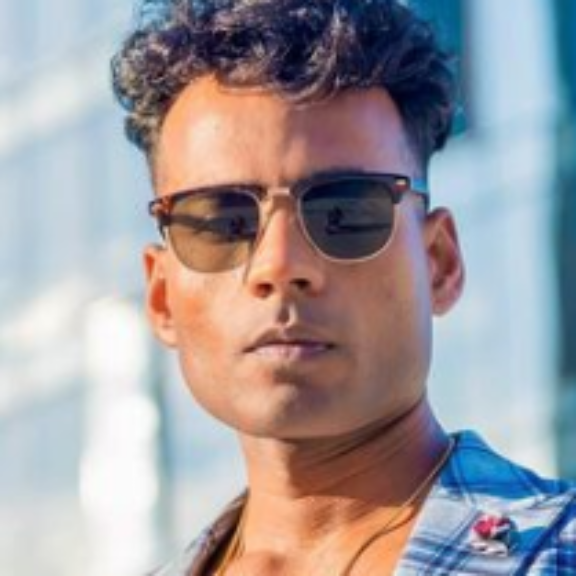

/content


In [6]:
from posixpath import dirname
import cv2
import dlib
import os
from IPython.display import Image, display

# Load the face detector model from dlib
detector = dlib.get_frontal_face_detector()

# Specify the directory name
dir_name = 'Trainset'

# List the contents of the directory
dir_contents = os.listdir(dir_name)

print(dir_contents)

# Filter for image files (e.g., jpg, png)
#image_files = [file for file in dir_contents if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Function to crop face in an image
def crop_face(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Check if the image is empty
    if img is None:
        print('Image is empty:', image_path)
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = detector(gray)

    # Crop the first detected face to a square shape
    if faces:
        x, y, w, h = faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height()
        x_inc = int(w*0.5)
        y_inc = int(h*0.5)
        face_roi = img[y-y_inc:y+h+y_inc, x-x_inc:x+w+x_inc]

        # Resize to a square shape
        #size = max(face_roi.shape[0], face_roi.shape[1])
        square_face = cv2.resize(face_roi, (576, 576))

        # Save the cropped face
        cv2.imwrite(image_path, square_face)

# Crop faces in each image
for image_file in dir_contents:
    image_path = os.path.join(dir_name, image_file)
    print('image_>path before cropped: ',image_path)
    crop_face(image_path)

# Display each cropped face in the notebook
for image_file in dir_contents:
    image_path = os.path.join(dir_name, image_file)
    print('image_>path after cropped: ',image_path)
    display(Image(filename=image_path))

# Save the current working directory
org_dir = os.getcwd()
print(org_dir)

In [47]:
## Now lets do super resolution of image

In [9]:
pip install tensorflow

In [10]:
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/sberbank-ai/Real-ESRGAN
%cd Real-ESRGAN
!git lfs fetch
!git lfs checkout

fatal: destination path 'Real-ESRGAN' already exists and is not an empty directory.
/content/Real-ESRGAN
fetch: Fetching reference refs/heads/main
Checking out LFS objects: 100% (3/3), 201 MB | 0 B/s, done.


In [11]:
!ls -lh

total 192M
-rw-r--r-- 1 root root 64M Dec 11 10:01 RealESRGAN_x2.pth
-rw-r--r-- 1 root root 64M Dec 11 10:01 RealESRGAN_x4.pth
-rw-r--r-- 1 root root 65M Dec 11 10:01 RealESRGAN_x8.pth


In [12]:
!pip install -q torch torchvision

In [13]:
!pip install -q git+https://github.com/sberbank-ai/Real-ESRGAN.git

  Preparing metadata (setup.py) ... done


In [14]:
import torch
from RealESRGAN import RealESRGAN

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = RealESRGAN(device, scale=4)
model.load_weights('RealESRGAN_x4.pth', download=False)

In [15]:
os.chdir('/content')

In [16]:
import PIL

In [17]:
from PIL import Image

dir_content : ['Screenshot 2023-12-11 014459.png']


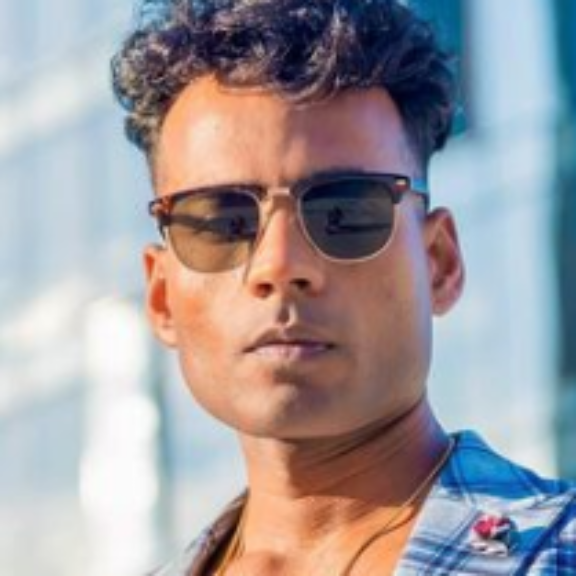

image path: Trainset/Screenshot 2023-12-11 014459.png


In [ ]:

import numpy as np
from IPython.display import Image, display
import os
from google.colab.patches import cv2_imshow

# Specify the directory name
dir_name = 'Trainset'

# List the contents of the directory
dir_contents = os.listdir(dir_name)
print('dir_content :',dir_contents)
# Filter for image files (e.g., jpg, png)
#image_files = [file for file in dir_contents if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Function to enhance resolution using ESRGAN
def enhance_resolution(image_path):
    print('image path:',image_path)
    img = PIL.Image.open(image_path).convert('RGB')
    sr_image = model.predict(img)
    # Save the enhanced image
    cv2.imwrite(image_path, sr_image)

# Enhance resolution for each image
for image_file in dir_contents:
    image_path = os.path.join(dir_name, image_file)
    cv2_imshow(cv2.imread(image_path))
    enhance_resolution(image_path)

# Display each enhanced image in the notebook
for image_file in dir_contents:
    image_path = os.path.join(dir_name, image_file)
    display(Image(filename=image_path))
